# 2.12 Строки и методы их обработки

## Извлечение и преобразование фрагментов

In [1]:
# извлечение и преобразование в числовые значения
a,b,c = map(float,'1|2|3'.split('|'))
a,b,c,a*b*c

(1.0, 2.0, 3.0, 6.0)

In [2]:
# ограничение количества фрагментов
'string methods in python'.split(' ',maxsplit=2)

['string', 'methods', 'in python']

In [3]:
# извлечение и преобразование в списки, кортежи и пр.
list('довод'), tuple('довод'), set('довод')

(['д', 'о', 'в', 'о', 'д'], ('д', 'о', 'в', 'о', 'д'), {'в', 'д', 'о'})

In [4]:
'string methods in python'.rsplit(' ',maxsplit=2)

['string methods', 'in', 'python']

In [5]:
# split vs splitlines
'две линии\n'.split('\n')

['две линии', '']

In [6]:
'одна линия\n'.splitlines()

['одна линия']

In [7]:
# Line Feed, Carriage Return, Line Feed, Carriage Return + Line Feed
print('ab\ncd','ab*\rcd!','ab**\ncd!!','ab***\r\ncd!!!')

ab
cd! ab**
cd!! ab***
cd!!!


In [8]:
# Line Tabulation, Form Feed
print('12\v34\x0b56!!!','12\f34\x0c56!!!')
# File Separator, 
print('12\x1c34!!!','12\x1d34!!!','12\x1e34!!!')
# Line Separator, Paragraph Separator, Next Line (C1 Control Code)
print('12\u202834!!!','12\u202934!!!','12\x8534!!!')

123456!!! 123456!!!
1234!!! 1234!!! 1234!!!
12 34!!! 12 34!!! 1234!!!


In [9]:
st='ab c\n\nde fg\rhij\r\nkl\vmn\fopr\u2028'
st.splitlines(),st.splitlines(keepends=True),st.split()

(['ab c', '', 'de fg', 'hij', 'kl', 'mn', 'opr'],
 ['ab c\n', '\n', 'de fg\r', 'hij\r\n', 'kl\x0b', 'mn\x0c', 'opr\u2028'],
 ['ab', 'c', 'de', 'fg', 'hij', 'kl', 'mn', 'opr'])

In [10]:
st = 'python is awesome!'
st.partition('is'),st.partition('was')

(('python ', 'is', ' awesome!'), ('python is awesome!', '', ''))

## Удаление и замена элементов

In [11]:
# замена фрагмента во всей строке
'  hello   '.replace('  ','*')

'*hello* '

In [12]:
# удаление начальных и конечных элементов
'   hello    '.strip(),'   hello hello   '.strip(),\
'@@@hello###'.strip('#@'),'@@@hello@@@###hello###'.strip('#@')

('hello', 'hello hello', 'hello', 'hello@@@###hello')

In [13]:
# слева или справа
'   hello   '.lstrip(),'###hello###'.rstrip('#')

('hello   ', '###hello')

In [14]:
# начинается с пробела, а не с \n
' \n \t hello\n'.strip('\n')

' \n \t hello'

In [15]:
# удалит и часть второго слова
'проект: пять!'.lstrip('проект: ')

'ять!'

[python shell](https://www.python.org/shell/)
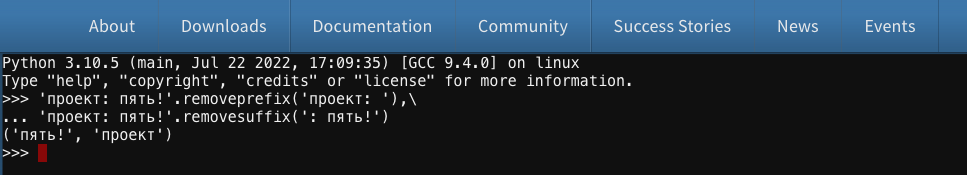

In [16]:
# python 3.9
#'проект: пять!'.removeprefix('проект: '),\
#'проект: пять!'.removesuffix(': пять!')

In [17]:
# используя анонимную функцию
''.join(filter(lambda x: x.isalpha(), 'abc123def456')),\
''.join(filter(lambda x: not x.isalpha(), 'abc123def456'))

('abcdef', '123456')

In [18]:
# не зависит от расположения заменяемого фрагмента
' \n \t hello\n'.replace('\n', '')

'  \t hello'

In [19]:
# с помощью регулярных выражений
import re
s = "string      methods    in  python"
re.sub("\s+","-",s),re.sub("\s","*",s)

('string-methods-in-python', 'string******methods****in**python')

In [20]:
# часть не удаляется, только весь объект
st = 'hello'
del st

## Срезы и соединения строк

In [21]:
st = 'string methods in python'
st[0],st[14:],st[:14],st[::3],st[::-1]

('s', ' in python', 'string methods', 'si tdiph', 'nohtyp ni sdohtem gnirts')

In [22]:
st[slice(1)],st[slice(14,None)],st[slice(14)],\
st[slice(None,None,3)],st[slice(None,None,-1)]

('s', ' in python', 'string methods', 'si tdiph', 'nohtyp ni sdohtem gnirts')

In [23]:
st = 'hello'
st[:2]+st[4:]

'heo'

In [24]:
# методом join
ls = ['string', 'methods', 'in', 'python']
ls,' '.join(ls),tuple(ls),' '.join(tuple(ls))

(['string', 'methods', 'in', 'python'],
 'string methods in python',
 ('string', 'methods', 'in', 'python'),
 'string methods in python')

In [25]:
# с оператором и без
'string '+'methods '+'in '+'python', \
'string ' 'methods ' 'in ' 'python'

('string methods in python', 'string methods in python')

In [26]:
# строковый объект с несколькими линиями
"""hello
 world"""

'hello\n world'

In [27]:
# одна строка
"""hello\
 world"""

'hello world'

## Регистры

In [28]:
# переключение
'ABCdef'.upper(), 'abcDEF'.lower(),\
'ABCdef'.swapcase(), 'abcDEF'.swapcase()

('ABCDEF', 'abcdef', 'abcDEF', 'ABCdef')

In [29]:
'hello, world!'.capitalize(), 'hello, world!'.title()

('Hello, world!', 'Hello, World!')

In [30]:
# title - не всегда грамматически корректный результат
"they're bill's friends from the UK".title()

"They'Re Bill'S Friends From The Uk"

In [31]:
# чуть получше, но без сокращений (UK)
import re
s = "they're bill's friends."
re.sub("[A-Za-z]+('[A-Za-z]+)?",
       lambda x: x.group(0).capitalize(),s)

"They're Bill's Friends."

In [32]:
# все ли буквы в нужном регистре
'PYTHON'.islower(),'python'.islower(),'Python'.islower(),\
'PYTHON'.isupper(),'python'.isupper(),'Python'.isupper()

(False, True, False, True, False, False)

## Декодирование

In [33]:
# взаимно обратные методы
"résumé".encode("utf-8"),b"r\xc3\xa9sum\xc3\xa9".decode("utf-8")

(b'r\xc3\xa9sum\xc3\xa9', 'résumé')

In [34]:
# юникод-символ
s = "🤨"
s,len(s),\
s.encode("utf-8"),len(s.encode("utf-8")),list(s.encode("utf-8")),\
s.encode("utf-16"),len(s.encode("utf-16")),list(s.encode("utf-16")),\
s.encode("utf-32"),len(s.encode("utf-32")),list(s.encode("utf-32"))

('🤨',
 1,
 b'\xf0\x9f\xa4\xa8',
 4,
 [240, 159, 164, 168],
 b'\xff\xfe>\xd8(\xdd',
 6,
 [255, 254, 62, 216, 40, 221],
 b'\xff\xfe\x00\x00(\xf9\x01\x00',
 8,
 [255, 254, 0, 0, 40, 249, 1, 0])

In [35]:
# несколько систем декодирования
letters = 'αβγδεζηθικλμνξοπρςστυφχψ'
enc8_letters = letters.encode('utf-8')
enc8_letters.decode('utf-8'),\
enc8_letters.decode('utf-16'),\
enc8_letters.decode('latin-1')

('αβγδεζηθικλμνξοπρςστυφχψ',
 '뇎닎돎듎뗎뛎럎룎많뫎믎볎뷎뻎뿎胏臏苏菏蓏藏蛏蟏裏',
 'Î±Î²Î³Î´ÎµÎ¶Î·Î¸Î¹ÎºÎ»Î¼Î½Î¾Î¿Ï\x80Ï\x81Ï\x82Ï\x83Ï\x84Ï\x85Ï\x86Ï\x87Ï\x88')

In [36]:
# latin-1 отображает дроби
b'\xbe cup of coffee'.decode('latin-1')

'¾ cup of coffee'

In [37]:
# ascii => U+0000-U+007F
letters = '12345abcde'
enc8_letters = letters.encode('utf-8')
enc8_letters.decode('ascii')

'12345abcde'

In [38]:
# особенности кириллицы
start, stop = 'Ё','ё'
''.join(chr(n) for n in range(ord(start), ord(stop) + 1))

'ЁЂЃЄЅІЇЈЉЊЋЌЍЎЏАБВГДЕЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯабвгдежзийклмнопрстуфхцчшщъыьэюяѐё'

In [39]:
# реакция объекта на встроенные функции
data=('abcαβγабв뇎닎돎')
print(print(data)), repr(data)

abcαβγабв뇎닎돎
None


(None, "'abcαβγабв뇎닎돎'")

In [40]:
# symbol, oct, hex, named, utf-16, utf-32
"a" == "\141" == "\x61" == \
"\N{LATIN SMALL LETTER A}" == \
"\u0061" == "\U00000061"

True

In [41]:
# подключение модуля
import unicodedata as ud
ud.name("€"),ud.lookup("EURO SIGN"),\
ud.name("🤨"),ud.lookup("FACE WITH ONE EYEBROW RAISED")

('EURO SIGN', '€', 'FACE WITH ONE EYEBROW RAISED', '🤨')

## Проверка состава объекта

In [42]:
# подсчет символов
'hello world'.count('o')

2

In [43]:
# in, not in
'e' in 'hello','lo' not in 'hello'

(True, False)

In [44]:
# обнаружение символов
st = 'машинное обучение'
idx = st.find('о')
print(idx,st[idx:])
idx = st.find('о',idx+1)
print(idx,st[idx:])
idx = st.rfind('о')
print(idx,st[idx::-1])

6 ое обучение
9 обучение
9 о еоннишам


In [45]:
# состоит ли строка только из цифр, из букв
"123".isdigit(), "абв".isalpha()

(True, True)

In [46]:
# ascii => U+0000-U+007F
'🤨'.isascii(),'αβγ'.isascii(),'뇎닎돎'.isascii(),'абв'.isascii(),\
'abc'.isascii(),'123'.isascii(),'!.,:;'.isascii()

(False, False, False, False, True, True, True)

In [47]:
# .isalnum() == c.isalpha()|.isdecimal()|.isdigit()|.isnumeric()
'🤨'.isalnum(),'!.,:;'.isalnum(),\
'αβγ123'.isalnum(),'뇎닎돎'.isalnum(),\
'абв123'.isalnum(),'abc123'.isalnum()

(False, False, True, True, True, True)

In [48]:
# символы, регулирующие свойства вывода
'\n'.isprintable(),'\t'.isprintable(),'\033['.isprintable()

(False, False, False)

In [49]:
# только пробелы
''.isspace(),'   '.isspace(),'hello'.isspace(),'hello hello'.isspace()

(False, True, False, False)

## Форматирование

In [50]:
# центрирование с заполнением
'hello'.center(21,'*')

'********hello********'

In [51]:
# выравнивание с заполнением
'hello'.ljust(21,'*'),'hello'.rjust(21,'*')

('hello****************', '****************hello')

In [52]:
# табуляция с определением количества символов
'01\t012\t0123\t01234'.expandtabs(),\
'01\t012\t0123\t01234'.expandtabs(3),\
'01\t012\t0123\t01234'.expandtabs(6),\
'01\t012\t0123\t01234'.expandtabs(9)

('01      012     0123    01234',
 '01 012   0123  01234',
 '01    012   0123  01234',
 '01       012      0123     01234')

In [53]:
# заполнение нулями
"12345".zfill(10),"-12345".zfill(10),"+12345".zfill(10)

('0000012345', '-000012345', '+000012345')

## "Старый стиль" форматирования

In [54]:
# ! - последний символ неотформатированного фрагмента
st = 'world'
'hello, !%30.1s!' % st

'hello, !                             w!'

In [55]:
# числовое форматирование
num = 22.55
'%030.5f' % num

'000000000000000000000022.55000'

In [56]:
# элементы словаря
'%(language)s has %(number)03d quote types: \', \"' % \
{'language': "python", "number": 2}

'python has 002 quote types: \', "'

## "Новый стиль" форматирования
`[[fill]align][sign][#][0][minimumwidth][.precision][type]`

In [57]:
# встроенная функция или метод строк format
format(10.,"10.5f"), "{:10.5f}".format(10), \
"{0:{1}}".format(10,"10.5f")

('  10.00000', '  10.00000', '  10.00000')

In [58]:
"the float value is {0:e}".format(2.1234)

'the float value is 2.123400e+00'

In [59]:
# игнорирование {} - двойные фигурные скобки
'только одна переменная - {{}} : {}'.format(5), \
'две переменные - {1} : {0}'.format(5,1)

('только одна переменная - {} : 5', 'две переменные - 1 : 5')

In [60]:
# игнорирование кавычек
# !r - repr(), !s - str()
"{0!r:25}".format("привет"), \
"{0!s:25}".format("\'привет\'"), \
"{:25}".format("\'привет\'")

("'привет'                 ",
 "'привет'                 ",
 "'привет'                 ")

## Строковая интерполяция f-string

In [61]:
# преобразование форматов
" ".join(f"{i:08b}" for i in (0xc3, 0xb1))

'11000011 10110001'

In [62]:
# подсчет значений
f"2 в 10-й степени равно {2**10}"

'2 в 10-й степени равно 1024'

In [63]:
# игнорирование команд цвета, табуляции и пр. 
# с применением параметров вывода на печать
st = '\tпривет\n'
back = f"\033[48;5;{253}m"
color = f"\033[38;5;{165}m"
string = f"{st:{50}s}"
print(back + " " + color + " " + string + " \033[0;0m")

  	привет
                                           


## Стандартный модуль `Template Strings`

In [64]:
from string import Template
name = 'Иван'
t = Template('Привет, $name!')
t.substitute(name=name)

'Привет, Иван!'